#### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀 
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함

In [167]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
#데이터 로드
DATA_FILE = '../data/auto_mpg.csv'
dataDF=pd.read_csv(DATA_FILE)
dataDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [169]:
dataDF['kml']=0
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kml
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0


In [170]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kml           398 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [171]:
# mpg = > kml 변환 (1 mpg는 약 0.425 km/L)
for i in range(397):
    dataDF.loc[i,'kml']=dataDF.loc[i,'mpg']*0.425

dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kml
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.650
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.375
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.650
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.800
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.225
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.475
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.700
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.600
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.900


In [172]:
# '?'인 행 찾기
bool_idx=(dataDF['horsepower']=='?')


In [173]:
# '?'인 행 인덱스 
idx=dataDF[bool_idx].index

In [174]:
# '?'인 행 삭제
dataDF.drop(idx,inplace=True)

In [175]:
bool_idx=(dataDF['horsepower']=='?')
dataDF[bool_idx].index

Index([], dtype='int64')

In [176]:
#인덱스 재설정
dataDF.reset_index(drop=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kml
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.650
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.375
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.650
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.800
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.225
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.475
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.700
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.600
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.900


In [177]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kml           392 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 33.7+ KB


In [178]:
# 데이터 타입 변경
dataDF['horsepower']=dataDF['horsepower'].astype(int)

In [179]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kml           392 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 32.2+ KB


In [180]:
dataDF.corr(numeric_only=True)['kml']

mpg             0.980134
cylinders      -0.761061
displacement   -0.789722
horsepower     -0.764669
weight         -0.820761
acceleration    0.404975
model year      0.558225
origin          0.566678
kml             1.000000
Name: kml, dtype: float64

In [181]:
name=dataDF.columns
name

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'kml'],
      dtype='object')

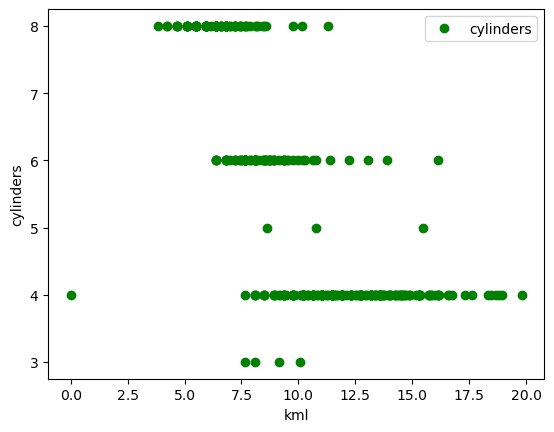

In [182]:
plt.plot(dataDF['kml'],dataDF['cylinders'], 'go',label='cylinders')
plt.xlabel('kml')
plt.ylabel('cylinders')
plt.legend()
plt.show()

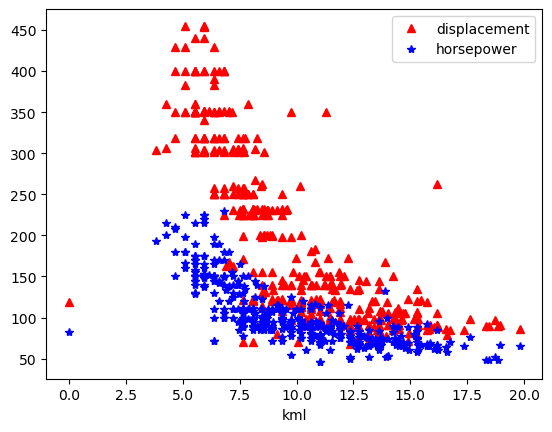

In [183]:
plt.plot(dataDF['kml'],dataDF['displacement'], 'r^',label='displacement')
plt.plot(dataDF['kml'],dataDF['horsepower'], 'b*',label='horsepower')
# plt.plot(dataDF['kml'],dataDF['weight'], 'g-',label='weight')
plt.xlabel('kml')
plt.legend()
plt.show()

In [224]:
features=dataDF[['displacement','horsepower']]
target=pd.Series(dataDF['kml'])

print(f'features => {features.shape}, {features.ndim}D') #2D
print(f'target => {target.shape}, {target.ndim}D') #1D

features => (392, 2), 2D
target => (392,), 1D


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [226]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10
                                                    )

In [227]:
print( f' X_train : {X_train.shape}, {X_train.ndim}D, y_train : {y_train.shape}, {y_train.ndim}D')
print( f' X_test : {X_test.shape}, {X_test.ndim}D, y_test : {y_test.shape}, {y_test.ndim}D')

 X_train : (313, 2), 2D, y_train : (313,), 1D
 X_test : (79, 2), 2D, y_test : (79,), 1D


In [228]:
#인덱스 정리
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [229]:
mmScaler = MinMaxScaler()

In [230]:
# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)
#mmScaler.fit(X_test)

MinMaxScaler()

In [231]:
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((79, 2), 0.0, 1.0)

In [232]:
#모듈로딩
from sklearn.linear_model import LinearRegression

In [233]:
# 모듈 인스턴스 생성
model=LinearRegression()

In [234]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(X_train_scaled,y_train)

LinearRegression()

In [235]:
# 학습 후 모델 파라미터 => 피쳐가 2개 => coef_2개
print(f'model.coef_:{len(model.coef_)} 개, {model.coef_}')
print(f'model.intercept_:{model.intercept_}')

model.coef_:2 개, [-6.49805294 -4.4287301 ]
model.intercept_:13.614825153701435


In [236]:
# 모듈 로딩 => 손실/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [237]:
# 점수 => 내부에서 predict()진행 ===> 결과로 R2 계수 추출해서 반환
score=model.score(X_train_scaled,y_train)
print(f'score : {score}')

score : 0.6551291179133675


In [238]:
model.score(X_test_scaled, y_test)

0.5635861892865277

In [239]:
# 성능지표 => 오차계산과 결정계수 계산
pre_kml=model.predict(X_train_scaled)

# 손실/비용 계산 함수 ==> 정답과 예측값
mse=mean_squared_error(y_train,pre_kml)
rmse=mean_squared_error(y_train,pre_kml,squared=False)
mae=mean_absolute_error(y_train, pre_kml)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2=r2_score(y_train, pre_kml)

In [240]:
## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2: {r2}')

mse : 3.742065877286481
rmse : 1.9344420067002477
mae : 1.4964463145736626
r2: 0.6551291179133675


In [264]:
def linear_check(columns):
	features=dataDF[columns]
	target=pd.Series(dataDF['kml'])
	
	X_train, X_test, y_train, y_test = train_test_split(features, 
														target,
														test_size=0.2,
														random_state=10
														)
	
	mmScaler = MinMaxScaler()
	mmScaler.fit(X_train)
	#mmScaler.fit(X_test)

	X_train_scaled=mmScaler.transform(X_train)
	X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()
	X_test_scaled=mmScaler.transform(X_test)
	X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()
	
	model=LinearRegression()
	model.fit(X_train_scaled,y_train)

	score=model.score(X_train_scaled,y_train)
	score2=model.score(X_test_scaled, y_test)
	print(f'★ score : {score}, test score : {score2} ★')
	
	# 성능지표 => 오차계산과 결정계수 계산
	pre_kml=model.predict(X_train_scaled)

	# 손실/비용 계산 함수 ==> 정답과 예측값
	mse=mean_squared_error(y_train,pre_kml)
	rmse=mean_squared_error(y_train,pre_kml,squared=False)
	mae=mean_absolute_error(y_train, pre_kml)

	# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울 수록 좋음
	r2=r2_score(y_train, pre_kml)

	## 손실/비용함수 값은 0에 가까울수록
	## 결정계수 값은 1에 가까울 수록 성능 좋은 모델
	print(f'mse : {mse}')
	print(f'rmse : {rmse}')
	print(f'mae : {mae}')
	print(f'r2: {r2}')

In [265]:
linear_check(['weight','displacement'])

★ score : 0.6939394883577459, test score : 0.6035035934868551 ★
mse : 3.320948959424237
rmse : 1.822347101795988
mae : 1.3945114272768342
r2: 0.6939394883577459


In [266]:
linear_check(['weight','horsepower'])

★ score : 0.7027702447106585, test score : 0.6058810705940147 ★
mse : 3.2251297014488305
rmse : 1.7958646111132182
mae : 1.3824955429197336
r2: 0.7027702447106585


In [267]:
linear_check(['weight','model year'])

★ score : 0.8110667447920918, test score : 0.6369466262069998 ★
mse : 2.0500445938505494
rmse : 1.4317976790910611
mae : 1.1137472658843885
r2: 0.8110667447920918


In [268]:
linear_check(['model year','horsepower'])

★ score : 0.6864009293748978, test score : 0.513817723718339 ★
mse : 3.4027470635812036
rmse : 1.8446536432569676
mae : 1.4660320752558855
r2: 0.6864009293748978
